**Feminicídio durante pandemia e pós pandemia
do Covid-19 no Estado de Minas Gerias**

- Grupo: Nádia Winy, Ranyelle dos Santos, Kaio Vinícius - ADS 4M ED2 - 021

In [ ]:
## Importando os pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-talk') # Um estilo pronto para criar um gráfico - para escolher outros - plt.style.available
import warnings
warnings.filterwarnings("ignore")

<ipython-input-1-d5fe5d871c3d>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk') # Um estilo pronto para criar um gráfico - para escolher outros - plt.style.available


In [ ]:
femi2020 = pd.read_csv('/content/feminicidio_2020.csv', sep= ';', encoding='ISO-8859-1')
femi2021 = pd.read_csv('/content/feminicidio_2021.csv', sep= ';', encoding='ISO-8859-1')
femi2022 = pd.read_csv('/content/feminicidio_2022.csv', sep= ';', encoding='ISO-8859-1')
femi2023 = pd.read_csv('/content/feminicidio_2023.csv', sep= ';', encoding='ISO-8859-1')

In [ ]:
dadosGeral = [femi2020, femi2021, femi2022, femi2023]


In [ ]:
result = pd.concat(dadosGeral, ignore_index=True)

In [ ]:
result.head(20)

,ï»¿municipio_cod,municipio_fato,data_fato,mes,ano,risp,rmbh,tentado_consumado,qtde_vitimas
0,311000,CAETE,2020-01-01,1,2020,3Âº Departamento - Vespasiano,2) RMBH (sem BH),TENTADO,1
1,312700,FRONTEIRA,2020-01-01,1,2020,5Âº Departamento - Uberaba,3) Interior de MG,TENTADO,1
2,310945,CABECEIRA GRANDE,2020-01-01,1,2020,16Âº Departamento - UnaÃ­,3) Interior de MG,CONSUMADO,1
3,314330,MONTES CLAROS,2020-01-02,1,2020,11Âº Departamento - Montes Claros,3) Interior de MG,TENTADO,1
4,315960,SANTA RITA DO SAPUCAI,2020-01-02,1,2020,17Âº Departamento - Pouso Alegre,3) Interior de MG,CONSUMADO,1


In [ ]:
result.shape

(334, 9)

In [ ]:
result.columns.to_list()

['ï»¿municipio_cod',
 'municipio_fato',
 'data_fato',
 'mes',
 'ano',
 'risp',
 'rmbh',
 'tentado_consumado',
 'qtde_vitimas']

In [ ]:
resultcopy = result.copy()


**Decisão sobre valores nulos**

In [ ]:
result.isna().sum()

ï»¿municipio_cod     0
municipio_fato       0
data_fato            0
mes                  0
ano                  0
risp                 0
rmbh                 0
tentado_consumado    0
qtde_vitimas         0
dtype: int64

In [ ]:
result.dtypes.value_counts()

object    5
int64     4
dtype: int64

**Selecionando colunas de Número e colunas de Texto**

In [ ]:
result.select_dtypes(include='number').head()

,ï»¿municipio_cod,mes,ano,qtde_vitimas
0,311000,1,2020,1
1,312700,1,2020,1
2,310945,1,2020,1
3,314330,1,2020,1
4,315960,1,2020,1


In [ ]:
result.select_dtypes(include='object').head()

,municipio_fato,data_fato,risp,rmbh,tentado_consumado
0,CAETE,2020-01-01,3Âº Departamento - Vespasiano,2) RMBH (sem BH),TENTADO
1,FRONTEIRA,2020-01-01,5Âº Departamento - Uberaba,3) Interior de MG,TENTADO
2,CABECEIRA GRANDE,2020-01-01,16Âº Departamento - UnaÃ­,3) Interior de MG,CONSUMADO
3,MONTES CLAROS,2020-01-02,11Âº Departamento - Montes Claros,3) Interior de MG,TENTADO
4,SANTA RITA DO SAPUCAI,2020-01-02,17Âº Departamento - Pouso Alegre,3) Interior de MG,CONSUMADO


**Escolha dos dados que iremos analisar**

In [ ]:
result['rmbh'].value_counts()


3) Interior de MG    862
2) RMBH (sem BH)     177
1) Belo Horizonte    147
Name: rmbh, dtype: int64

In [ ]:
result['risp'].value_counts()

1Âº Departamento - Belo Horizonte          147
2Âº Departamento - Contagem                140
12Âº Departamento - Ipatinga               104
4Âº Departamento - Juiz de Fora             86
11Âº Departamento - Montes Claros           76
7Âº Departamento - DivinÃ³polis             67
9Âº Departamento - UberlÃ¢ndia              65
15Âº Departamento - TeÃ³filo Otoni          55
18Âº Departamento - PoÃ§os de Caldas        53
8Âº Departamento - Governador Valadares     52
14Âº Departamento - Curvelo                 50
5Âº Departamento - Uberaba                  45
3Âº Departamento - Vespasiano               44
17Âº Departamento - Pouso Alegre            38
16Âº Departamento - UnaÃ­                   37
10Âº Departamento - Patos de Minas          37
13Âº Departamento - Barbacena               35
6Âº Departamento - Lavras                   31
19Âº Departamento - Sete Lagoas             24
Name: risp, dtype: int64

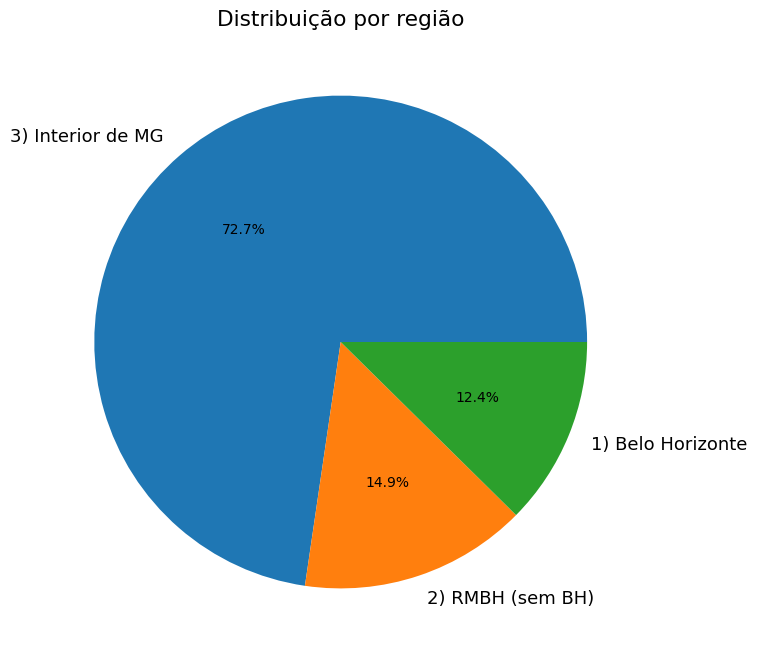

In [ ]:
plt.figure(figsize=(8, 8))
result['rmbh'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%')

plt.title('Distribuição por região')
plt.ylabel('')
plt.show()

In [ ]:
result['rmbh'].value_counts()


3) Interior de MG    862
2) RMBH (sem BH)     177
1) Belo Horizonte    147
Name: rmbh, dtype: int64

In [ ]:
result['municipio_fato'].value_counts()

BELO HORIZONTE        147
CONTAGEM               44
UBERLANDIA             33
RIBEIRAO DAS NEVES     30
BETIM                  27
                     ... 
SENADOR CORTES          1
TAPARUBA                1
TAPIRA                  1
VIRGINOPOLIS            1
ARACAI                  1
Name: municipio_fato, Length: 393, dtype: int64

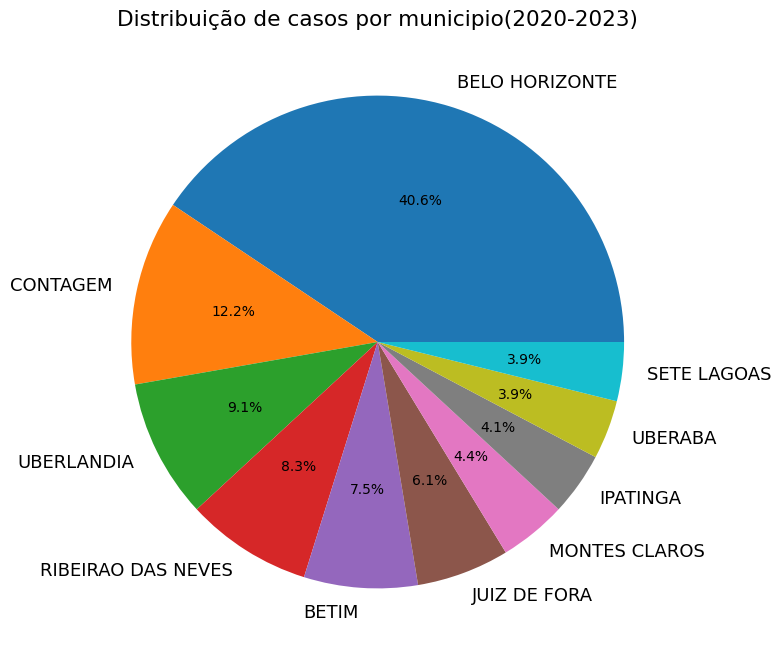

In [ ]:
plt.figure(figsize=(8, 8))
result['municipio_fato'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%')

plt.title('Distribuição de casos por municipio(2020-2023)')
plt.ylabel('')
plt.show()

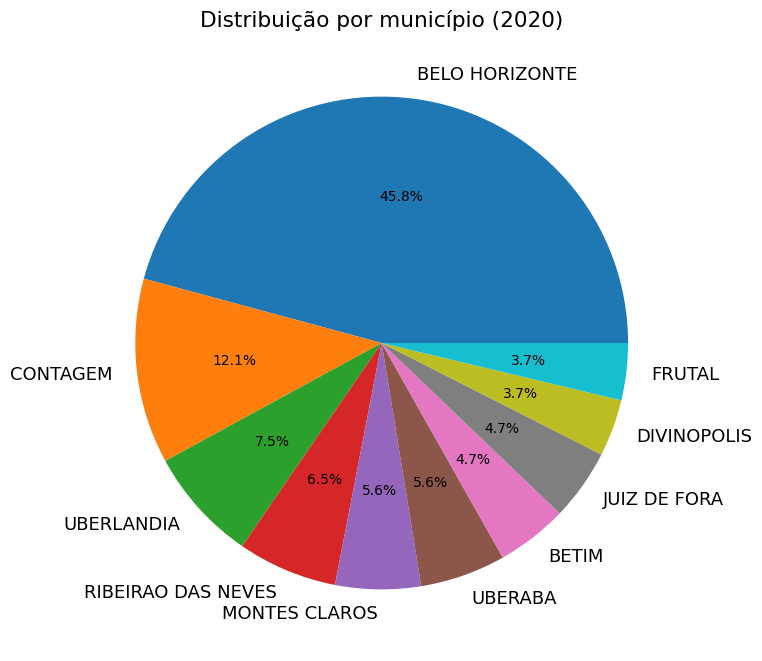

In [ ]:
result_2020 = result[result['ano'] == 2020]

plt.figure(figsize=(8, 8))
result_2020['municipio_fato'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%')

plt.title('Distribuição por município (2020)')
plt.ylabel('')
plt.show()

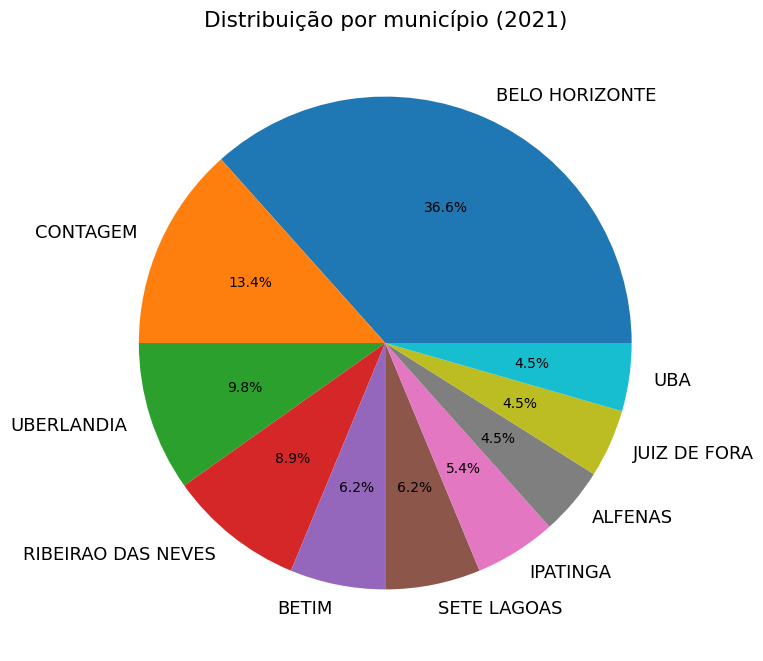

In [ ]:
result_2021 = result[result['ano'] == 2021]

plt.figure(figsize=(8, 8))
result_2021['municipio_fato'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%')

plt.title('Distribuição por município (2021)')
plt.ylabel('')
plt.show()


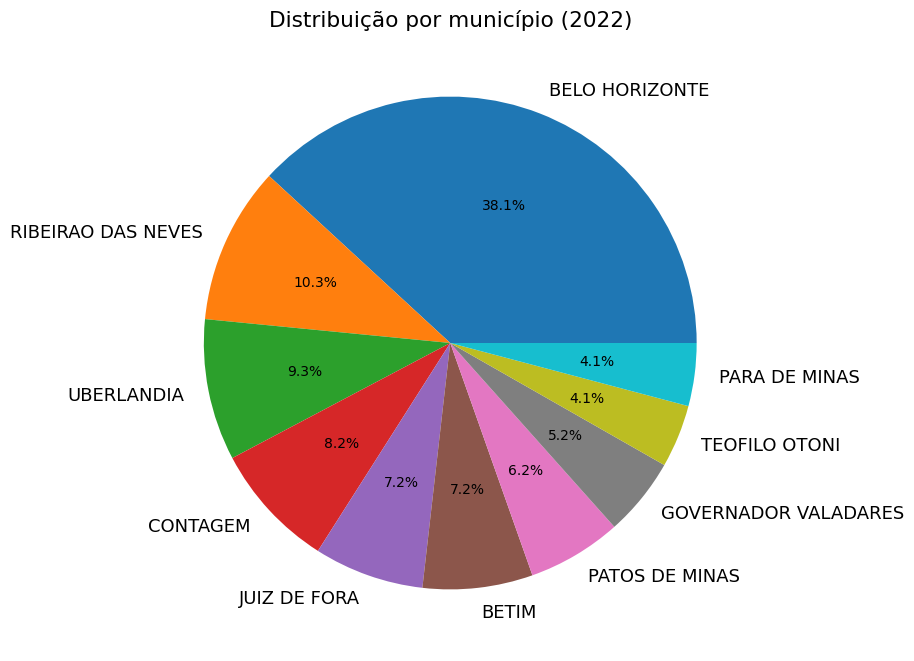

In [ ]:
result_2022 = result[result['ano'] == 2022]

plt.figure(figsize=(8, 8))
result_2022['municipio_fato'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%')

plt.title('Distribuição por município (2022)')
plt.ylabel('')
plt.show()


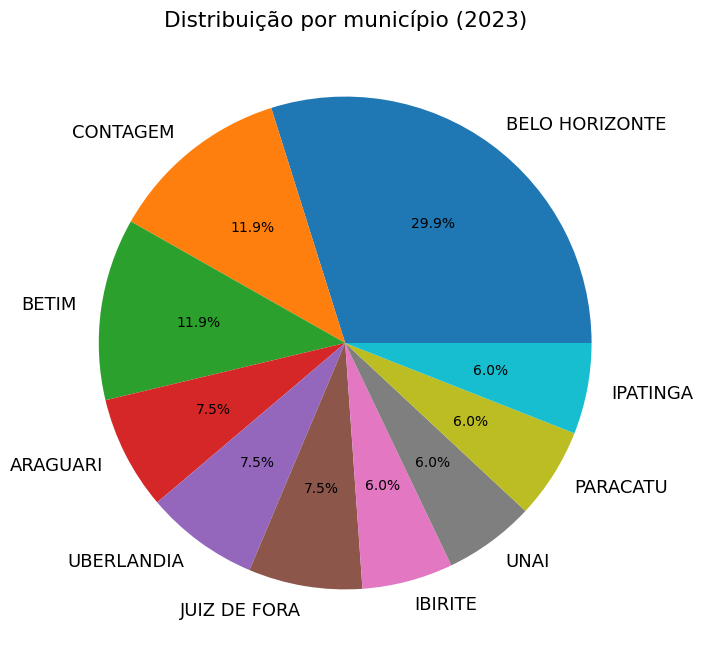

In [ ]:
result_2023 = result[result['ano'] == 2023]

plt.figure(figsize=(8, 8))
result_2023['municipio_fato'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%')

plt.title('Distribuição por município (2023)')
plt.ylabel('')
plt.show()


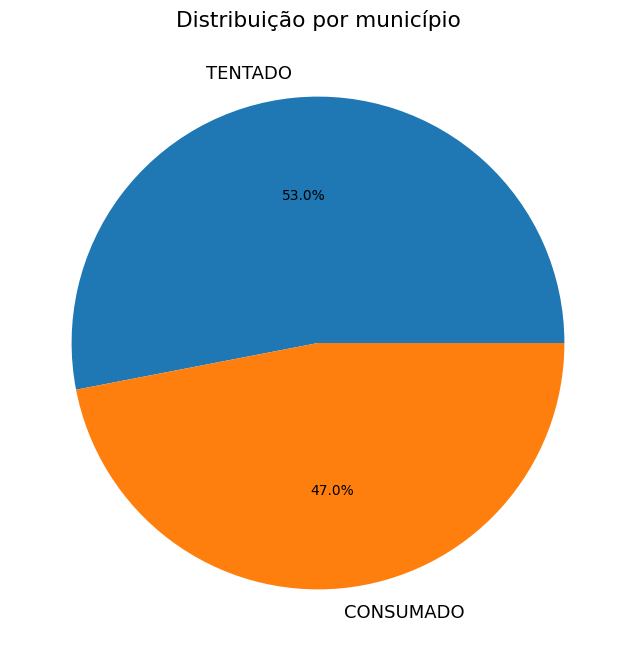

In [ ]:
plt.figure(figsize=(8, 8))
result['tentado_consumado'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.title('Distribuição por município')
plt.ylabel('')
plt.show()

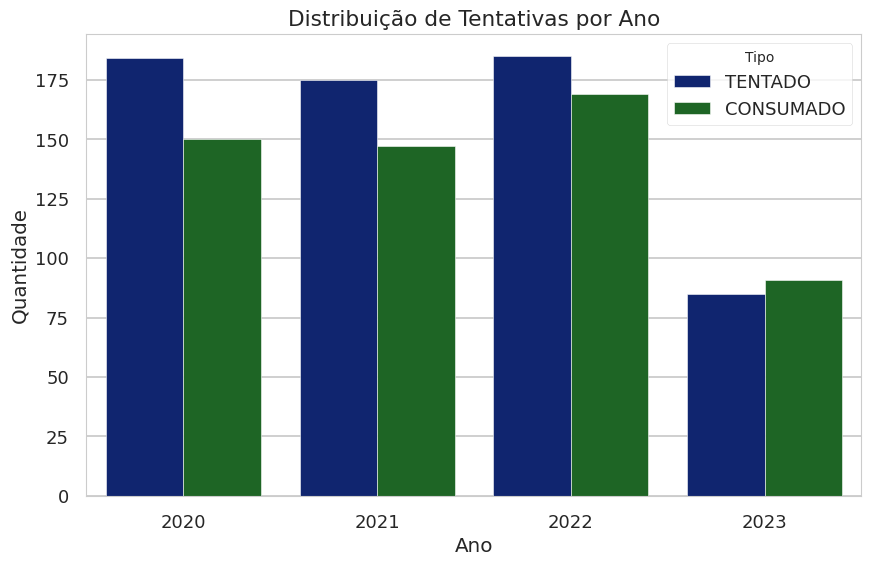

In [ ]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.countplot(x='ano', hue='tentado_consumado', data=result, palette='dark6')

plt.title('Distribuição de Tentativas por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')

plt.legend(title='Tipo', loc='upper right')

plt.show()


In [ ]:
result_2021['tentado_consumado'].value_counts()


TENTADO      175
CONSUMADO    147
Name: tentado_consumado, dtype: int64

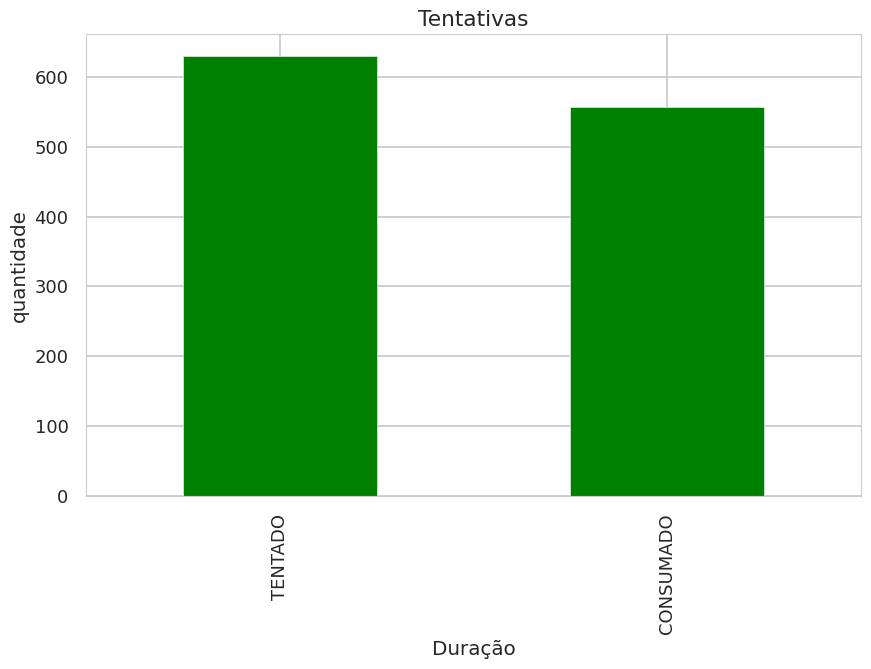

In [ ]:
plt.figure(figsize=(10, 6))
result['tentado_consumado'].value_counts().plot(kind='bar', color='green')
plt.title('Tentativas 2020-2023')
plt.xlabel('Duração')
plt.ylabel('quantidade')
plt.show()


In [ ]:
result_2022['tentado_consumado'].value_counts()


TENTADO      185
CONSUMADO    169
Name: tentado_consumado, dtype: int64

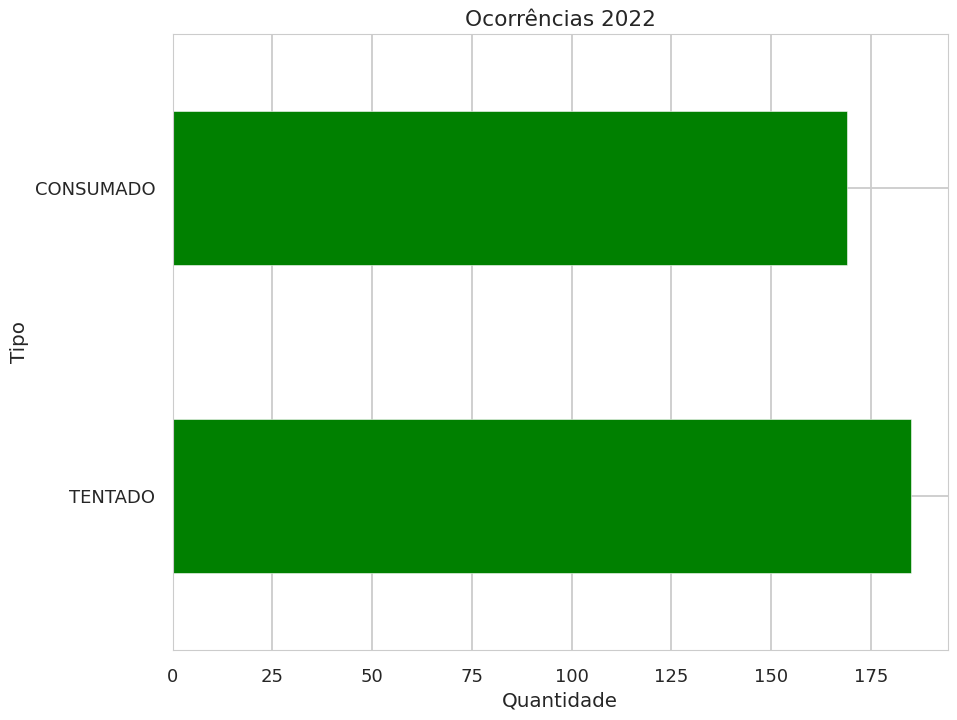

In [ ]:

plt.figure(figsize=(10, 8))
result_2022['tentado_consumado'].value_counts().plot(kind='barh', color='green')
plt.title('Ocorrências 2022')
plt.xlabel('Quantidade')
plt.ylabel('Tipo')
plt.show()



In [ ]:
result_2023['mes'].value_counts()


1    30
5    28
4    26
3    24
6    23
7    23
2    22
Name: mes, dtype: int64

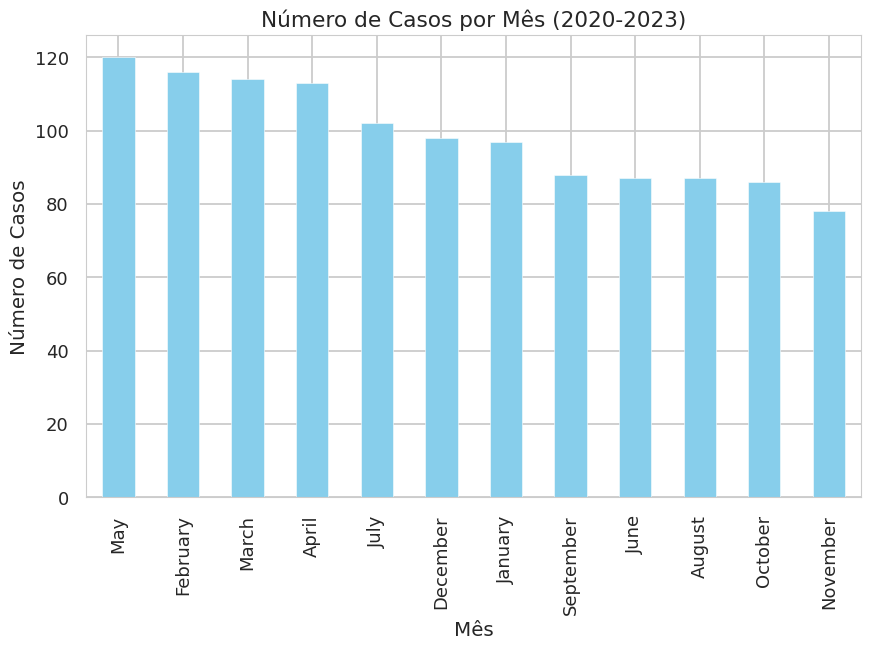

In [ ]:
result['mes'] = pd.to_datetime(result['mes'], format='%m').dt.month_name()

month_counts = result['mes'].value_counts()

plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='skyblue')

plt.title('Número de Casos por Mês (2020-2023)')
plt.xlabel('Mês')
plt.ylabel('Número de Casos')
plt.show()


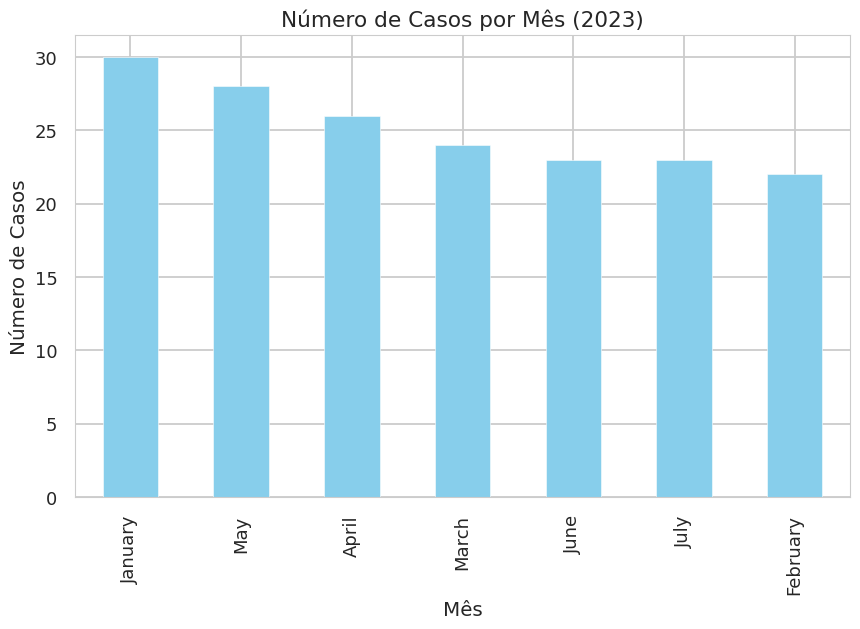

In [ ]:
result_2023['mes'] = pd.to_datetime(result_2023['mes'], format='%m').dt.month_name()

month_counts = result_2023['mes'].value_counts()

plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='skyblue')

plt.title('Número de Casos por Mês (2023)')
plt.xlabel('Mês')
plt.ylabel('Número de Casos')
plt.show()


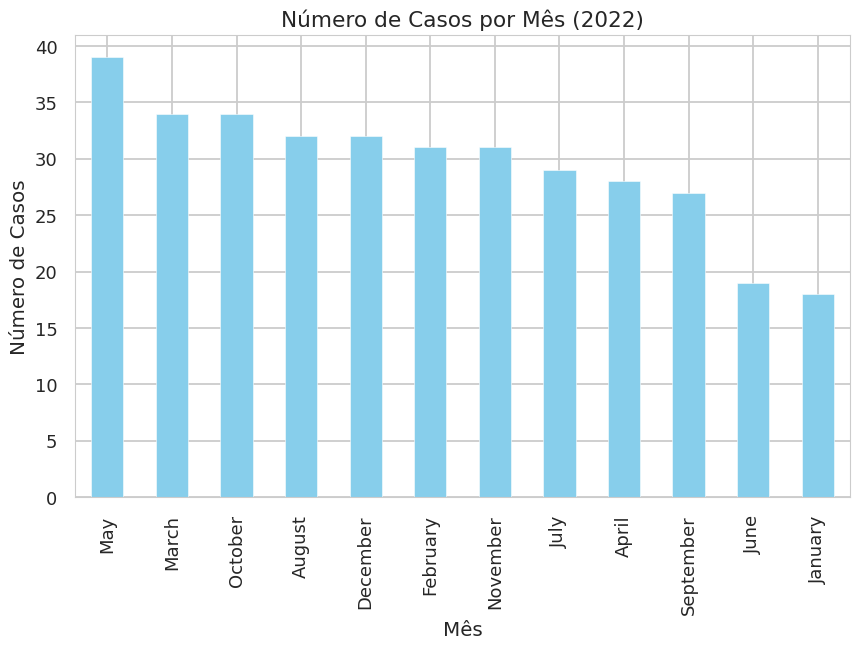

In [ ]:
result_2022['mes'] = pd.to_datetime(result_2022['mes'], format='%m').dt.month_name()

# Count the number of cases for each month
month_counts = result_2022['mes'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='skyblue')

plt.title('Número de Casos por Mês (2022)')
plt.xlabel('Mês')
plt.ylabel('Número de Casos')
plt.show()


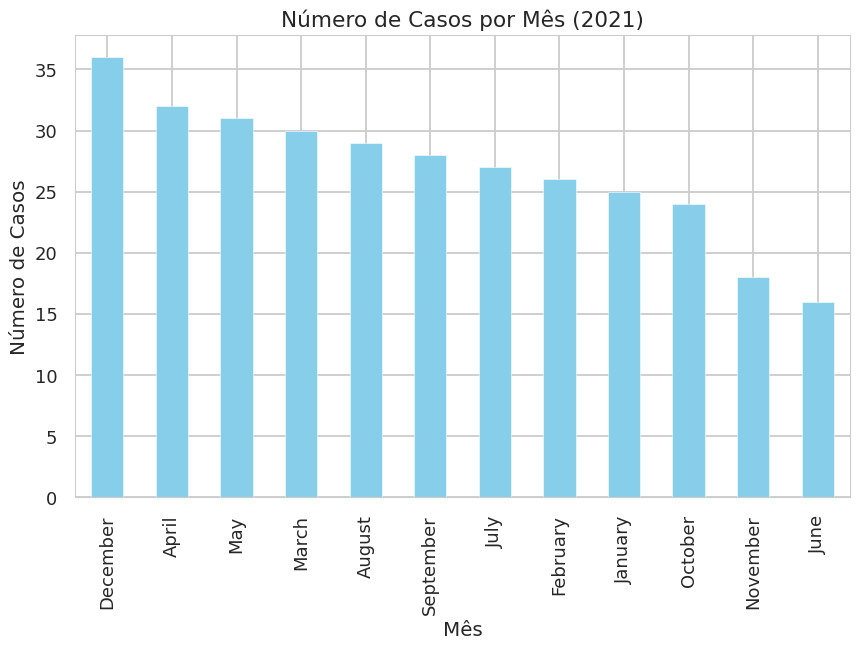

In [ ]:
result_2021['mes'] = pd.to_datetime(result_2021['mes'], format='%m').dt.month_name()

# Count the number of cases for each month
month_counts = result_2021['mes'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='skyblue')

plt.title('Número de Casos por Mês (2021)')
plt.xlabel('Mês')
plt.ylabel('Número de Casos')
plt.show()


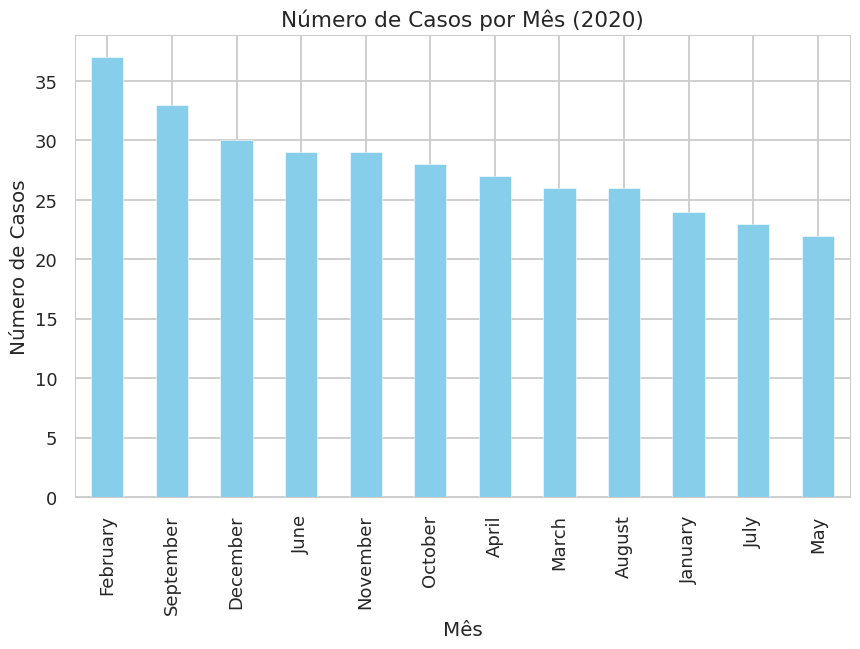

In [ ]:
result_2020['mes'] = pd.to_datetime(result_2020['mes'], format='%m').dt.month_name()

# Count the number of cases for each month
month_counts = result_2020['mes'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='skyblue')

plt.title('Número de Casos por Mês (2020)')
plt.xlabel('Mês')
plt.ylabel('Número de Casos')
plt.show()


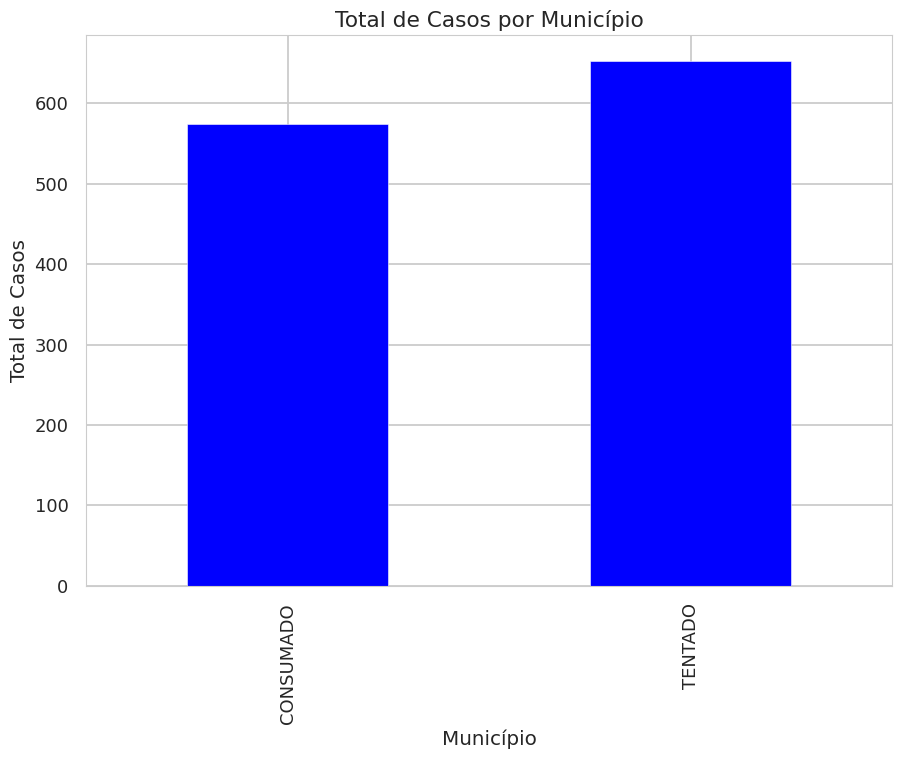

In [ ]:

# Agrupe os dados por 'municipio_fato' e calcule o total de casos
total_casos = result.groupby('tentado_consumado')['qtde_vitimas'].sum()

# Crie um gráfico de barras
total_casos.plot(kind='bar', color='blue')

# Adicione rótulos e título ao gráfico
plt.xlabel('Município')
plt.ylabel('Total de Casos')
plt.title('Total de Casos por Município')

# Exiba o gráfico
plt.show()
